In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('muskan_data.csv')
print(data.head())





  Patient ID Session 1 -BADS Session 2 - BADS Session 3 -BADS Session 4 -BADS  \
0     JRH-24              21              NaN             NaN             NaN   
1      MC-24              42               36              39              39   
2      TL-24             NaN              NaN             NaN             NaN   
3      KS-24             NaN               25             NaN             NaN   
4     RD -24             NaN              NaN             NaN             NaN   

  Session 5 -BADS Session 6 -BADS Session 7 -BADS Session 8 -BADS  \
0             NaN             NaN             NaN             NaN   
1              39              39              39              39   
2             NaN             NaN             NaN             NaN   
3              26             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

  Total Sessions Attended  Average Patient BADS Score  
0                       1                 

In [3]:
## Preprocessing: Understanding the data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               22 non-null     object 
 1   Session 1 -BADS          6 non-null      float64
 2   Session 2 - BADS         5 non-null      float64
 3   Session 3 -BADS          5 non-null      float64
 4   Session 4 -BADS          5 non-null      float64
 5   Session 5 -BADS          7 non-null      float64
 6   Session 6 -BADS          7 non-null      float64
 7   Session 7 -BADS          5 non-null      float64
 8   Session 8 -BADS          4 non-null      float64
 9   Total Sessions Attended  22 non-null     int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 1.8+ KB
None


In [4]:
data.describe()

,Session 1 -BADS,Session 2 - BADS,Session 3 -BADS,Session 4 -BADS,Session 5 -BADS,Session 6 -BADS,Session 7 -BADS,Session 8 -BADS,Total Sessions Attended
count,6.000000,5.000000,5.000000,5.00000,7.000000,7.000000,5.000000,4.000000,22.000000
mean,29.833333,25.800000,30.200000,30.60000,38.857143,32.714286,33.800000,30.000000,2.681818
std,7.909909,8.136338,5.403702,6.94982,6.743604,6.969321,7.190271,6.377042,2.009178
min,21.000000,14.000000,25.000000,24.00000,26.000000,24.000000,25.000000,24.000000,1.000000
25%,24.500000,24.000000,27.000000,25.00000,37.000000,26.000000,27.000000,27.000000,1.000000
50%,28.000000,25.000000,29.000000,28.00000,41.000000,38.000000,38.000000,28.500000,2.000000
75%,34.500000,30.000000,31.000000,37.00000,42.000000,38.000000,39.000000,31.500000,3.000000
max,42.000000,36.000000,39.000000,39.00000,47.000000,39.000000,40.000000,39.000000,8.000000


In [44]:
data.describe(include='object')

,Patient ID,Session 1 -BADS,Session 2 - BADS,Session 3 -BADS,Session 4 -BADS,Session 5 -BADS,Session 6 -BADS,Session 7 -BADS,Session 8 -BADS,Total Sessions Attended
count,31,15,14,14,14,16,16,14,13,31
unique,31,13,9,9,9,12,10,9,11,11
top,JRH-24,21,36,39,39,41,38,39,39,1
freq,1,2,2,2,2,3,5,2,2,11


In [42]:
dataT=data.T
dataT.describe()


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
unique,4.0,4.0,2.0,5.0,2.0,2.0,5.0,2.0,4.0,8.0,...,4.0,4.0,8.0,6.0,4.0,8.0,4.0,5.0,4.0,4.0
top,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,7.0,7.0,9.0,6.0,9.0,9.0,6.0,9.0,6.0,2.0,...,7.0,7.0,2.0,5.0,6.0,3.0,7.0,6.0,7.0,7.0


In [9]:
sessionAttended = data['Total Sessions Attended']
data.drop(columns=['Total Sessions Attended'], inplace=True)



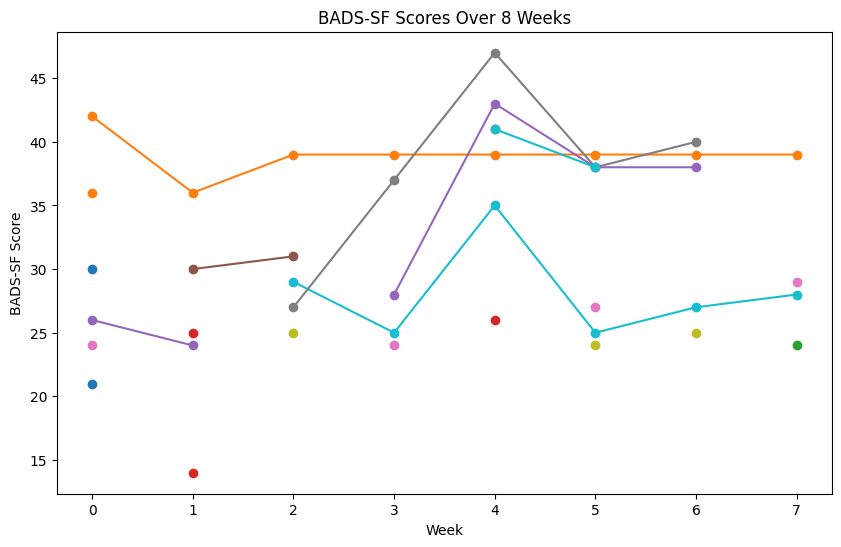

In [17]:
plt.figure(figsize=(10, 6))
for patient in data['Patient ID']:
    plt.plot(data.columns[1:], data.loc[data['Patient ID'] == patient].iloc[0, 1:], marker='o', label=patient)
plt.xlabel('Week')
x_labels = list(range(0, 8))
# Labeling the x-axis with sequential numbers
plt.xticks(ticks=x_labels, labels=x_labels)
plt.ylabel('BADS-SF Score')
plt.title('BADS-SF Scores Over 8 Weeks')
#plt.legend()
plt.show()

In [34]:
##average BADS score per patient
#data.head()
data.fillna(0, inplace=True)
data.head()


,Patient ID,Session 1 -BADS,Session 2 - BADS,Session 3 -BADS,Session 4 -BADS,Session 5 -BADS,Session 6 -BADS,Session 7 -BADS,Session 8 -BADS
0,JRH-24,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MC-24,42.0,36.0,39.0,39.0,39.0,39.0,39.0,39.0
2,TL-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,KS-24,0.0,25.0,0.0,0.0,26.0,0.0,0.0,0.0
4,RD -24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
BADSColumns = data.drop(columns=['Patient ID'])
BADSColumns.head()

,Session 1 -BADS,Session 2 - BADS,Session 3 -BADS,Session 4 -BADS,Session 5 -BADS,Session 6 -BADS,Session 7 -BADS,Session 8 -BADS
0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42.0,36.0,39.0,39.0,39.0,39.0,39.0,39.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,25.0,0.0,0.0,26.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data['Average BADS Score'] = BADSColumns.mean(axis=1)
data['Average BADS Score'].head(20)

0      2.625
1     39.000
2      0.000
3      6.375
4      0.000
5      0.000
6      7.000
7      0.000
8      6.250
9     21.125
10     0.000
11     0.000
12     3.000
13     1.750
14    24.625
15    12.750
16     6.000
17    23.625
18     3.000
19     9.875
Name: Average BADS Score, dtype: float64